# PRIVATE INVESTMENT IN EDUCATION
# Model Becker-Tomes without credit constraints (1986)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
import sympy as sm
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display
import plotly.graph_objects as go
from types import SimpleNamespace
import math

# Ensure modules are reloaded on each run
%load_ext autoreload
%autoreload 2

# Assuming the class BeckerTomesModelDebugged is defined in the module named Noah
from Maritza import BeckerTomesModelDebugged

# Create an instance of the model
model = BeckerTomesModelDebugged()

Calculating Endowment: E1=2.7 for E0=2
Calculating Human Capital: H1=[2.56785828] for X0=[0.5], S0=1.0, E1=2.7
Calculating Income: Y1=[3.06785828] for H1=[2.56785828], I1=0.5
Calculating Debt: D1=[0.5] for X0=[0.5], Y0=5
Objective Function: Value=[-2.54285828] for X0=[0.5]
Calculating Endowment: E1=2.7 for E0=2
Calculating Human Capital: H1=[2.56785829] for X0=[0.50000001], S0=1.0, E1=2.7
Calculating Income: Y1=[3.06785829] for H1=[2.56785829], I1=0.5
Calculating Debt: D1=[0.50000001] for X0=[0.50000001], Y0=5
Objective Function: Value=[-2.54285828] for X0=[0.50000001]
Calculating Endowment: E1=2.7 for E0=2
Calculating Human Capital: H1=[2.12634576] for X0=[0.0562866], S0=1.0, E1=2.7
Calculating Income: Y1=[2.62634576] for H1=[2.12634576], I1=0.5
Calculating Debt: D1=[0.0562866] for X0=[0.0562866], Y0=5
Objective Function: Value=[-2.56724483] for X0=[0.0562866]
Calculating Endowment: E1=2.7 for E0=2
Calculating Human Capital: H1=[2.12634579] for X0=[0.05628662], S0=1.0, E1=2.7
Calculat

# Model description

The model proposed by Becker and Tomes in 1967 focuses specifically on the investment decisions individuals make regarding their education without considering financial constraints. This model contributes to literature on intergenerational income persistence and inequality. 

Additionality, it is relevant for understanding how individuals make decisions about investing in education and human capital formation when they do not face limitations on accessing financial resources or credit.

In it important to consider that, we have to take the following assumptions to get into the model:
- Parents invest in children's human capital.
- Structure or credit markets matter.
- Intergenerational income persistence via heritability of endowments (Income effect transmitted bia human vapital investment), which means that if parents have a mean above or below incomes, their children will have incomes closer to the mean than parents. 
- The heritability leads to "regression to mean" of human capital and income, which means that when a variable is extreme at the first measurement, it will tend to be closer to average on its second measurement. 

The model presents a representative individual whose chooses how much time to invest in education in 2 periods in time ${t-1}$ (Child youth and parent adulthood) and time ${t}$ (Child adulthood, and grandchild). Human capital production depends on parental and public expenditures and endowment. 

The equation we have to maximize is: 

$$
Max_{x_{t-1}}Y_{t}-(1+r_{t})D_{t-1}
$$

$$
s.t
$$

$$
Y_{t}=H_{t}+I_{t}
$$

$$
H_{t}=\psi({x_{t-1}},{s_{t-1}},{E_{t}})
$$

$$
E_{t}= \alpha_{t} + h{E_{t-1}} + v_{t}
$$

$$
D_{t-1}= C_{t-1}+ x_{t-1}-Y_{t-1}
$$

Where $Y_{t}$ is the maximization of the children's income, $H_{t}$ is the Human Capital, Luckiness is represented by $I_{t}$, $x_{t-1}$ is the parents investment in education, $s_{t-1}$ is the government investment in education, $E_{t}$ is the children's endowments, $h$ is the intergenerational feature, the rate from the financial market is represented by $r_{t}$, $C_{t-1}$ is the Consumption, and $(1+r_{t})D_{t-1}$ is when children pay for the debt with an interest rate.

Notice that:

$\psi'(.)>0$ in all inputs ($H_{t}$ is a growing functions) and $\psi'(.)<0$ shows a decreasing returns.

## Analytical solution

$$
Max_{x_{t-1}}\psi({x_{t-1}},{s_{t-1}},\alpha_{t} + h{E_{t-1}} + v_{t})+ I_{t}-(1+r_{t})C_{t-1}+ x_{t-1}-Y_{t-1}
$$

Considering that all the restrictions are included, we do not need the Lagrangean. However, we will derivate in terms of $x_{t-1}$ to find how much income the children will receuve if the parents invest more (return of education).

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

from scipy import optimize

import sympy as sm
from IPython.display import display

#Defining all variables

x1 = sm.symbols('x_{t-1}')
s1 = sm.symbols('s_{t-1}')
alpha = sm.symbols('alpha_t')
h = sm.symbols('h')
E1 = sm.symbols('alpha_t+h{E_{t-1}}+v_t')
v = sm.symbols('v_t')
I = sm.symbols('I_t')
r = sm.symbols('r_t')
C1 = sm.symbols('C_{t-1}')
Y1 = sm.symbols('Y_{t-1}')

#Defining psi as a function
psi = sp.Function('psi')(x1, s1, E1)

print('x1 is of type: ', type(x1))

x1 is of type:  <class 'sympy.core.symbol.Symbol'>


In [78]:
# Main equation 
objective = psi+I-((1+r)*(C1+x1-Y1))
objective

I_t - (r_t + 1)*(C_{t-1} - Y_{t-1} + x_{t-1}) + psi(x_{t-1}, s_{t-1}, alpha_t+h{E_{t-1}}+v_t)

In [79]:
#Taking the derivative in terms of x1
foc = sm.diff(objective, x1)
foc

-r_t + Derivative(psi(x_{t-1}, s_{t-1}, alpha_t+h{E_{t-1}}+v_t), x_{t-1}) - 1

In [80]:
#In progress
#Solving the FOC
sol = sm.solve(sm.Eq(foc,0), x1)
sol[0]

IndexError: list index out of range

In [10]:
# Solve the model using continuous optimization
model.solve_continuous()
# Print the results from the continuous solution
print(f'Optimal parental investment: {model.sol.optimal_X}')
print(f'Human capital level: {model.human_capital_production(model.sol.optimal_X, model.par.S0, model.par.E0)}')
print(f'Optimal income: {model.calc_income(model.human_capital_production(model.sol.optimal_X, model.par.S0, model.par.E0), model.par.I1)}')

Calculating Endowment: E1=2.7 for E0=2
Calculating Human Capital: H1=[2.56785828] for X0=[0.5], S0=1.0, E1=2.7
Calculating Income: Y1=[3.06785828] for H1=[2.56785828], I1=0.5
Calculating Debt: D1=[0.5] for X0=[0.5], Y0=5
Objective Function: Value=[-2.54285828] for X0=[0.5]
Calculating Endowment: E1=2.7 for E0=2
Calculating Human Capital: H1=[2.56785829] for X0=[0.50000001], S0=1.0, E1=2.7
Calculating Income: Y1=[3.06785829] for H1=[2.56785829], I1=0.5
Calculating Debt: D1=[0.50000001] for X0=[0.50000001], Y0=5
Objective Function: Value=[-2.54285828] for X0=[0.50000001]
Calculating Endowment: E1=2.7 for E0=2
Calculating Human Capital: H1=[2.12634576] for X0=[0.0562866], S0=1.0, E1=2.7
Calculating Income: Y1=[2.62634576] for H1=[2.12634576], I1=0.5
Calculating Debt: D1=[0.0562866] for X0=[0.0562866], Y0=5
Objective Function: Value=[-2.56724483] for X0=[0.0562866]
Calculating Endowment: E1=2.7 for E0=2
Calculating Human Capital: H1=[2.12634579] for X0=[0.05628662], S0=1.0, E1=2.7
Calculat

In [11]:
# Solve the model using discrete optimization
model.solve_discrete()

# Access and print the optimal values from the discrete solution
print(f'Optimal X0: {model.sol.optimal_X0}')
print(f'Optimal E1: {model.endowment_production(model.par.E0)}')
print(f'Optimal H1: {model.human_capital_production(model.sol.optimal_X0, model.par.S0, model.endowment_production(model.par.E0))}')
print(f'Optimal Y1: {model.calc_income(model.human_capital_production(model.sol.optimal_X0, model.par.S0, model.endowment_production(model.par.E0)), model.par.I1)}')
print(f'Optimal D1: {model.calc_debt(model.sol.optimal_X0, model.par.Y0)}')

Calculating Endowment: E1=2.7 for E0=2
Calculating Human Capital: H1=1.81 for X0=0.0, S0=1.0, E1=2.7
Calculating Income: Y1=2.31 for H1=1.81, I1=0.5
Calculating Debt: D1=0.0 for X0=0.0, Y0=5
Objective Function: Value=-2.31 for X0=0.0
New Optimal Found: X0=0.0, Utility=2.31
Calculating Endowment: E1=2.7 for E0=2
Calculating Human Capital: H1=2.20971083617722 for X0=0.10101010101010101, S0=1.0, E1=2.7
Calculating Income: Y1=2.70971083617722 for H1=2.20971083617722, I1=0.5
Calculating Debt: D1=0.10101010101010122 for X0=0.10101010101010101, Y0=5
Objective Function: Value=-2.603650230116614 for X0=0.10101010101010101
New Optimal Found: X0=0.10101010101010101, Utility=2.603650230116614
Calculating Endowment: E1=2.7 for E0=2
Calculating Human Capital: H1=2.33742161035749 for X0=0.20202020202020202, S0=1.0, E1=2.7
Calculating Income: Y1=2.83742161035749 for H1=2.33742161035749, I1=0.5
Calculating Debt: D1=0.20202020202020243 for X0=0.20202020202020202, Y0=5
Objective Function: Value=-2.625300

Calculating Endowment: E1=2.7 for E0=2
Calculating Human Capital: H1=[1.81] for X0=[0.], S0=1.0, E1=2.7
Calculating Income: Y1=[2.31] for H1=[1.81], I1=0.5
Calculating Debt: D1=[0.] for X0=[0.], Y0=5
Objective Function: Value=[-2.31] for X0=[0.]
Calculating Endowment: E1=2.7 for E0=2
Calculating Human Capital: H1=[1.8107401] for X0=[1.49011612e-08], S0=1.0, E1=2.7
Calculating Income: Y1=[2.3107401] for H1=[1.8107401], I1=0.5
Calculating Debt: D1=[1.49011612e-08] for X0=[1.49011612e-08], Y0=5
Objective Function: Value=[-2.31074008] for X0=[1.49011612e-08]
Calculating Endowment: E1=2.7 for E0=2
Calculating Human Capital: H1=[77.39289117] for X0=[49665.9504514], S0=1.0, E1=2.7
Calculating Income: Y1=[77.89289117] for H1=[77.39289117], I1=0.5
Calculating Debt: D1=[49665.9504514] for X0=[49665.9504514], Y0=5
Objective Function: Value=[52071.35508281] for X0=[49665.9504514]
Calculating Endowment: E1=2.7 for E0=2
Calculating Human Capital: H1=[59.09063646] for X0=[24832.45099768], S0=1.0, E1=

c:\Users\PC\Dropbox\0. Personal\000. Maestría\0. University of Copenhagen - MSc Economics\Courses\6. Introduction Programming\projects-2024-petra-maritza-noah\modelproject\Maritza.py:30: RuntimeWarning: invalid value encountered in power
  par = self.par = SimpleNamespace() #group of variables that now is empty


Calculating Endowment: E1=2.7 for E0=2
Calculating Human Capital: H1=[2.33602778] for X0=[0.20068814], S0=1.0, E1=2.7
Calculating Income: Y1=[2.83602778] for H1=[2.33602778], I1=0.5
Calculating Debt: D1=[0.20068814] for X0=[0.20068814], Y0=5
Objective Function: Value=[-2.62530524] for X0=[0.20068814]
Continuous Solution: Optimal X0=0.2006881220957295
Calculating Human Capital: H1=2.5496282444627414 for X0=0.8787878787878788, S0=1.0, E1=2
Calculating Income: Y1=3.0496282444627414 for H1=2.5496282444627414, I1=0.5
Calculating Endowment: E1=2.7 for E0=2
Calculating Human Capital: H1=[2.7725935] for X0=[0.90909091], S0=1.0, E1=2.7
Calculating Income: Y1=[3.2725935] for H1=[2.7725935], I1=0.5
Calculating Debt: D1=[0.90909091] for X0=[0.90909091], Y0=5
Objective Function: Value=[-2.31804805] for X0=[0.90909091]
Calculating Endowment: E1=2.7 for E0=2
Calculating Human Capital: H1=[2.77259351] for X0=[0.90909092], S0=1.0, E1=2.7
Calculating Income: Y1=[3.27259351] for H1=[2.77259351], I1=0.5
C

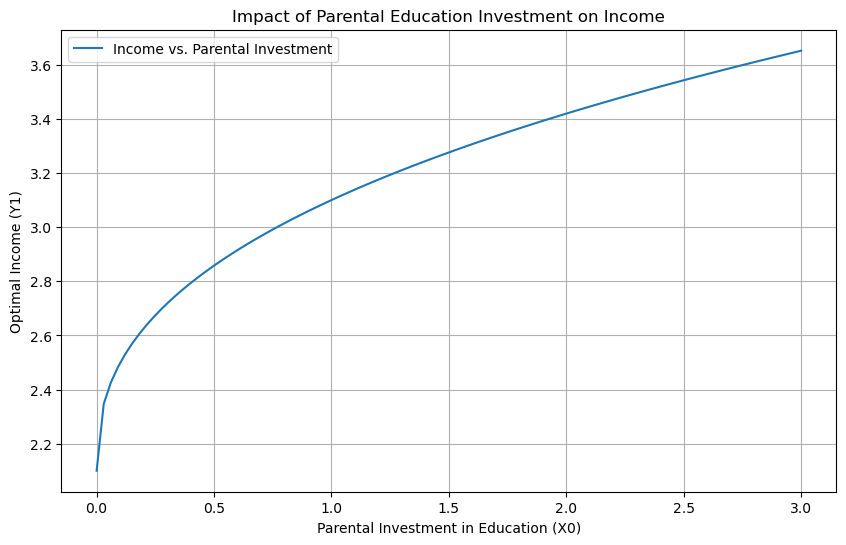

In [12]:
# Set a range of values for parental investment (X0)
X0_values = np.linspace(0, 3, 100)  # Adjust the range and count as needed
income_results = []

# Iterate over the range of X0 values, solve the model, and collect incomes
for X0 in X0_values:
    model.par.X0 = X0  # Update the parental investment parameter
    model.solve_continuous()  # Solve the model (assuming this updates the model.sol with new values)
    optimal_H = model.human_capital_production(X0, model.par.S0, model.par.E0)
    optimal_income = model.calc_income(optimal_H, model.par.I1)
    income_results.append(optimal_income)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(X0_values, income_results, label='Income vs. Parental Investment')
plt.xlabel('Parental Investment in Education (X0)')
plt.ylabel('Optimal Income (Y1)')
plt.title('Impact of Parental Education Investment on Income')
plt.grid(True)
plt.legend()
plt.show()